In [ ]:
!pip install gstools scikit-gstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.6/708.6 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 14.2 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#library for performing simple kriging
import gstools as gs

In [ ]:
# data here
data = pd.read_csv('/content/Air_pollution.csv')
data.head()

,latitude,longitude,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
0,8.514909,76.943588,10.0,7.0,69.0,14.0,30.0,63.0,17.0
1,8.563700,76.886500,42.0,1.0,6.0,36.0,58.0,39.0,6.0
2,8.728442,77.696200,29.0,1.0,6.0,6.0,27.0,25.0,19.0
3,8.816428,78.099039,30.0,NaN,20.0,1.0,251.0,NaN,5.0
4,8.878700,76.607300,15.0,NaN,NaN,35.0,NaN,NaN,NaN


In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [ ]:
print("Number of duplicates",data.duplicated().sum())
print("NUmber of null items\n",data.isna().sum())

Number of duplicates 0
NUmber of null items
 latitude     0
longitude    0
CO           0
NH3          0
NO2          0
OZONE        0
PM10         0
PM2.5        0
SO2          0
dtype: int64


In [ ]:
from shapely.geometry import Point

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(
       data['longitude'], data['latitude']
    ),
    crs="EPSG:4326"
)

gdf.head()

,latitude,longitude,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2,geometry
0,8.514909,76.943588,10.0,7.0,69.0,14.0,30.0,63.0,17.0,POINT (76.94359 8.51491)
1,8.563700,76.886500,42.0,1.0,6.0,36.0,58.0,39.0,6.0,POINT (76.8865 8.5637)
2,8.728442,77.696200,29.0,1.0,6.0,6.0,27.0,25.0,19.0,POINT (77.6962 8.72844)
5,9.363990,78.831977,24.0,2.0,13.0,4.0,29.0,23.0,13.0,POINT (78.83198 9.36399)
6,9.559382,77.948828,19.0,2.0,19.0,4.0,42.0,37.0,19.0,POINT (77.94883 9.55938)


In [ ]:
gdf = gdf.to_crs('EPSG:32643')
gdf

,latitude,longitude,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2,geometry
0,8.514909,76.943588,10.0,7.0,69.0,14.0,30.0,63.0,17.0,POINT (713943.975 941760.039)
1,8.563700,76.886500,42.0,1.0,6.0,36.0,58.0,39.0,6.0,POINT (707631.305 947125.764)
2,8.728442,77.696200,29.0,1.0,6.0,6.0,27.0,25.0,19.0,POINT (796672.964 965889.566)
5,9.363990,78.831977,24.0,2.0,13.0,4.0,29.0,23.0,13.0,POINT (921057.777 1037387.806)
6,9.559382,77.948828,19.0,2.0,19.0,4.0,42.0,37.0,19.0,POINT (823740.156 1058081.276)
...,...,...,...,...,...,...,...,...,...,...
447,30.736056,76.209694,6.0,7.0,28.0,32.0,55.0,43.0,5.0,POINT (615805.719 3400975.771)
448,30.751462,76.762879,26.0,4.0,9.0,110.0,62.0,44.0,5.0,POINT (668742.813 3403385.818)
450,30.943887,76.801991,51.0,7.0,41.0,32.0,97.0,52.0,65.0,POINT (672143.106 3424775.457)
452,31.321907,75.578914,42.0,1.0,30.0,47.0,52.0,39.0,17.0,POINT (555080.55 3465422.865)


<Axes: >

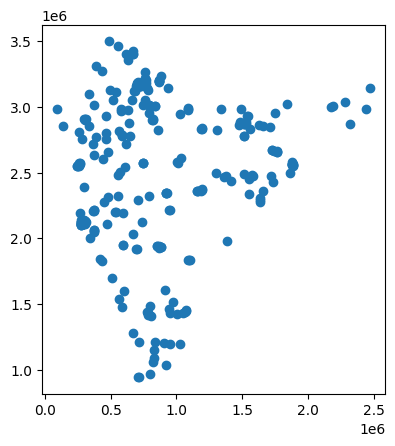

In [ ]:
gdf.plot()

In [ ]:
x = gdf.geometry.x
y = gdf.geometry.y

# Prepare coordinates propertt for gstools
coords = [x.values, y.values]
z = gdf.PM10

In [ ]:
boundary = gpd.read_file(r'/content/india_States_level_1.shp')

<Axes: >

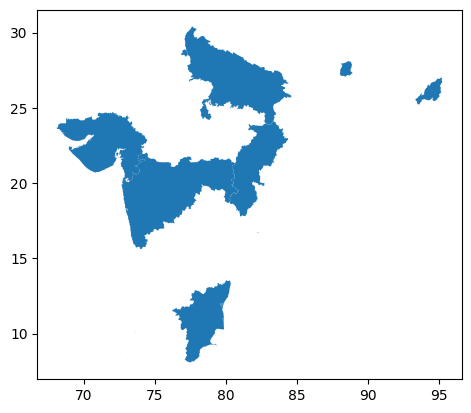

In [ ]:
boundary.plot()

In [ ]:
boundary = boundary.to_crs(32643)
boundary.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
minx, miny, maxx, maxy = boundary.total_bounds
resolution = 30

In [ ]:
# Compute empirical variogram
bin_center, gamma = gs.vario_estimate(coords, z)

# Choose a model
model = gs.Exponential(dim=2)

# Fit the model to the empirical variogram
model.fit_variogram(bin_center, gamma, nugget=True)

# Print the fitted parameters
print('Fitted length scale:', model.len_scale)
print("Fitted varience (still):", model.var)
print("Fitted nugget:", model.nugget)

Fitted length scale: 3488502131.215879
Fitted varience (still): 543108.9289659159
Fitted nugget: 440.67957865673037


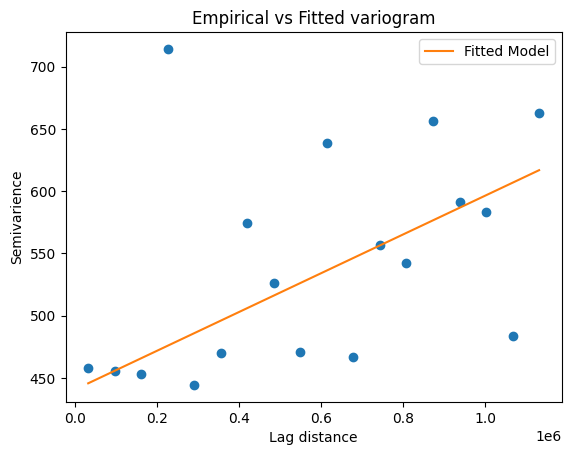

In [ ]:
plt.plot(bin_center, gamma, 'o')
plt.plot(bin_center, model.variogram(bin_center), label="Fitted Model")
plt.xlabel('Lag distance')
plt.ylabel('Semivarience')
plt.legend()
plt.title("Empirical vs Fitted variogram")
plt.show()

In [ ]:
# Define grid for interpolation
grid_lon = np.arange(minx, maxx+5000, 5000)
grid_lat = np.arange(miny, maxy+5000, 5000)

grid_xx, grid_yy = np.meshgrid(grid_lon, grid_lat)

In [ ]:
print("Shape of grid:", grid_xx.shape)
print("Total grid points:", grid_xx.size)

Shape of grid: (496, 552)
Total grid points: 273792


In [ ]:
# Simple kriging requires the mean
model.mean = np.mean(z)

# Set up simple kringing
krig = gs.krige.Simple(model, cond_pos=coords, cond_val=z)

# Predict on grid
field, variance = krig((grid_xx.ravel(), grid_yy.ravel()), chunk_size=50000)
field = field.reshape(grid_xx.shape)

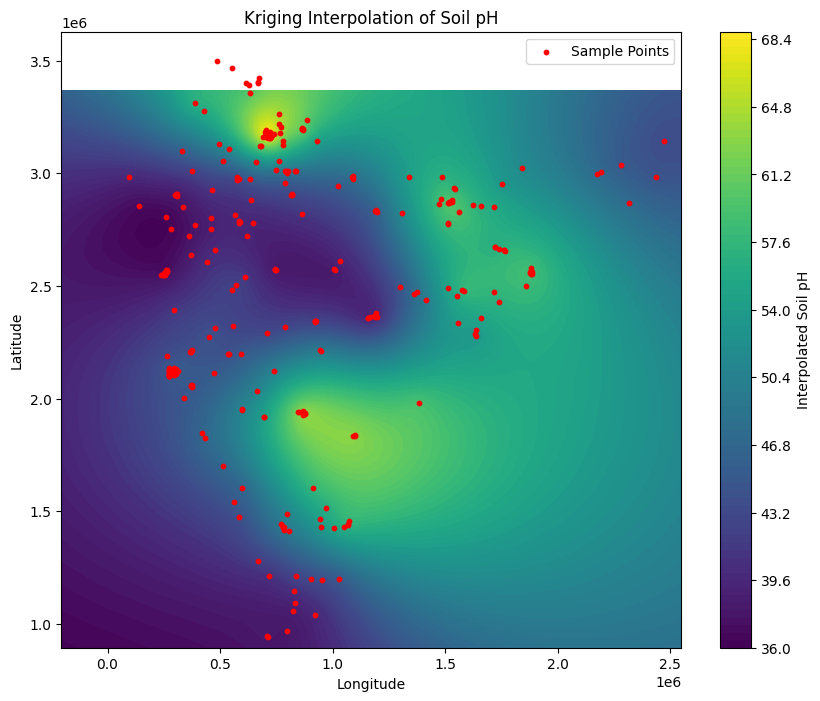

In [ ]:
# Plot
plt.figure(figsize=(10, 8))
plt.contourf(grid_xx, grid_yy, field, cmap='viridis', levels=100)
plt.colorbar(label='Interpolated Soil pH')
plt.scatter(x, y, c='red', label='Sample Points', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kriging Interpolation of Soil pH')
plt.legend()
plt.show()